FILTRO DE ARMÓNICOS


Generamos una señal con 10 frecuencias

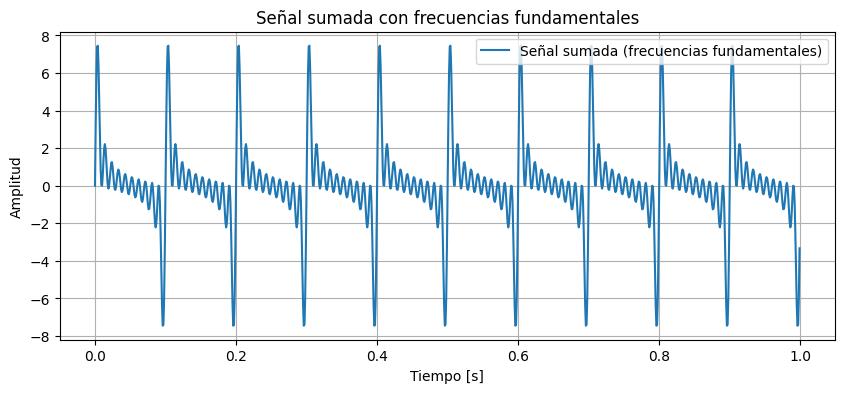

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
duracion = 1  # Duración en segundos
frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz

# Tiempo de muestreo
t = np.linspace(0, duracion, int(frecuencia_muestreo * duracion), endpoint=False)

# Frecuencias fundamentales (10 Hz y sus múltiplos hasta 100 Hz)
frecuencias = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Generar un diccionario para almacenar las señales
senales = {}
for f in frecuencias:
    senales[f] = np.sin(2 * np.pi * f * t)

# Sumar todas las señales sinusoidales
senal_sumada = np.sum(list(senales.values()), axis=0)

# Graficar la señal sumada
plt.figure(figsize=(10, 4))
plt.plot(t, senal_sumada, label='Señal sumada (frecuencias fundamentales)')
plt.title('Señal sumada con frecuencias fundamentales')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


Agregamos ruido blanco gausiano de 0.3

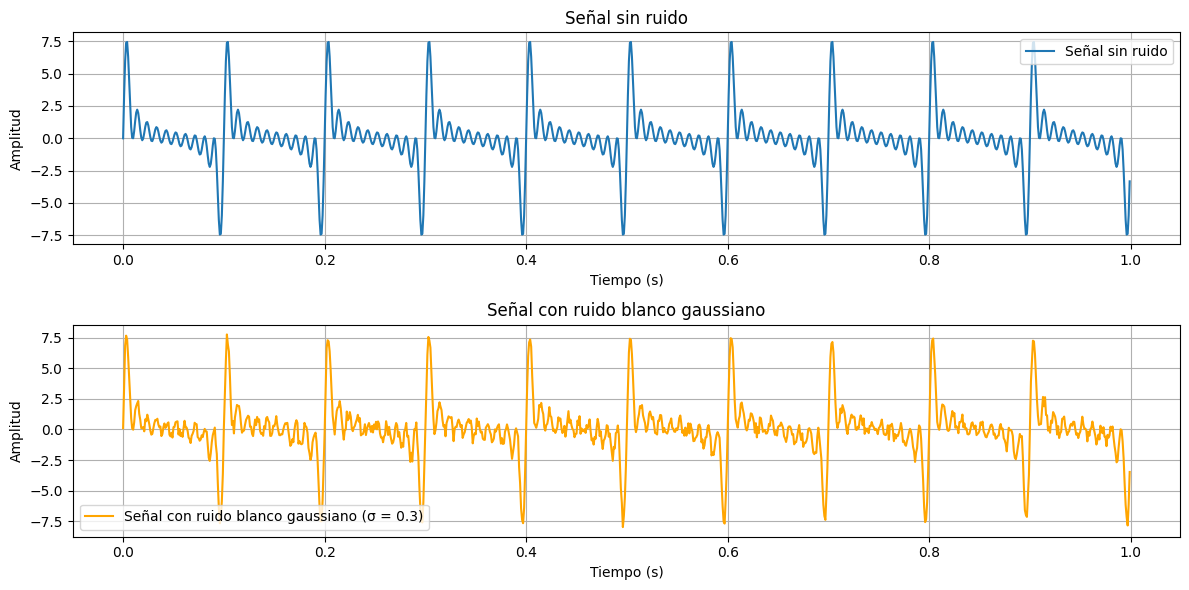

In [ ]:
# Generar ruido blanco gaussiano
Noi = np.random.normal(0, 0.3, len(t))  # Media 0, desviación estándar 0.3

# Adicionar el ruido blanco gaussiano a la señal sumada
senal_con_ruido = senal_sumada + Noi

# Graficar ambas señales
plt.figure(figsize=(12, 6))

# Señal sin ruido
plt.subplot(2, 1, 1)
plt.plot(t, senal_sumada, label='Señal sin ruido')
plt.title('Señal sin ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Señal con ruido blanco gaussiano
plt.subplot(2, 1, 2)
plt.plot(t, senal_con_ruido, label='Señal con ruido blanco gaussiano (σ = 0.3)', color='orange')
plt.title('Señal con ruido blanco gaussiano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Calculamos la FFT de la señal con ruido

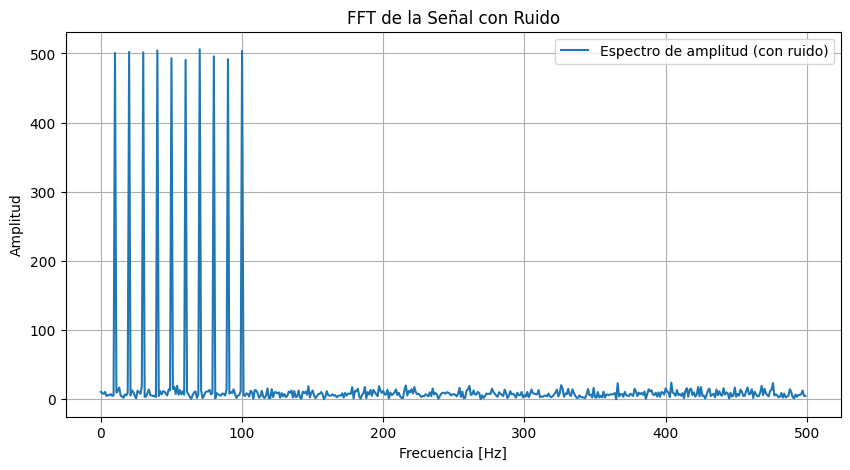

In [ ]:
# Realizar la FFT de la señal con ruido
fft_senal = np.fft.fft(senal_con_ruido)
frecuencias = np.fft.fftfreq(len(t), d=1/frecuencia_muestreo)

# Tomar solo la mitad positiva de la FFT y las frecuencias (ya que es simétrica)
fft_senal_magnitud = np.abs(fft_senal[:len(t)//2])
frecuencias_positivas = frecuencias[:len(t)//2]

# Graficar la FFT de la señal con ruido
plt.figure(figsize=(10, 5))
plt.plot(frecuencias_positivas, fft_senal_magnitud, label='Espectro de amplitud (con ruido)')
plt.title('FFT de la Señal con Ruido')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()


Reconstruimos la señal en el dominio del tiempo usando la IFFT

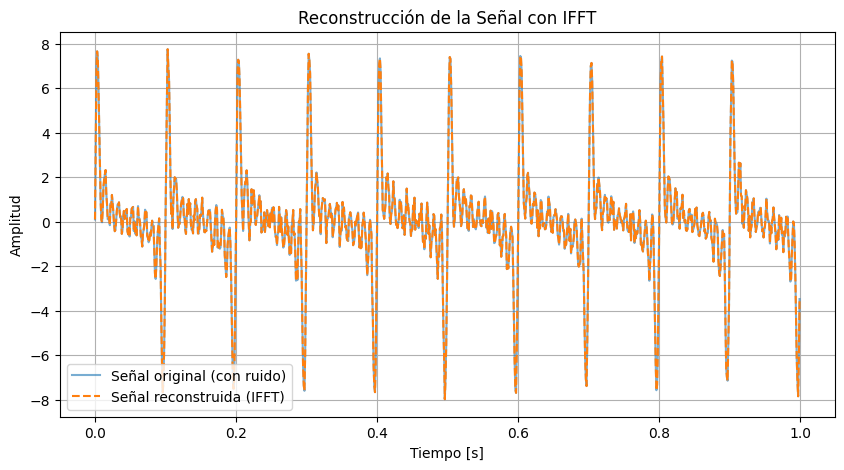

In [ ]:
# Reconstrucción de la señal en el dominio del tiempo usando la IFFT
senal_reconstruida = np.fft.ifft(fft_senal).real  # Solo la parte real, ya que la señal es real

# Graficar la señal reconstruida
plt.figure(figsize=(10, 5))
plt.plot(t, senal_con_ruido, label='Señal original (con ruido)', alpha=0.6)
plt.plot(t, senal_reconstruida, label='Señal reconstruida (IFFT)', linestyle='--')
plt.title('Reconstrucción de la Señal con IFFT')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()



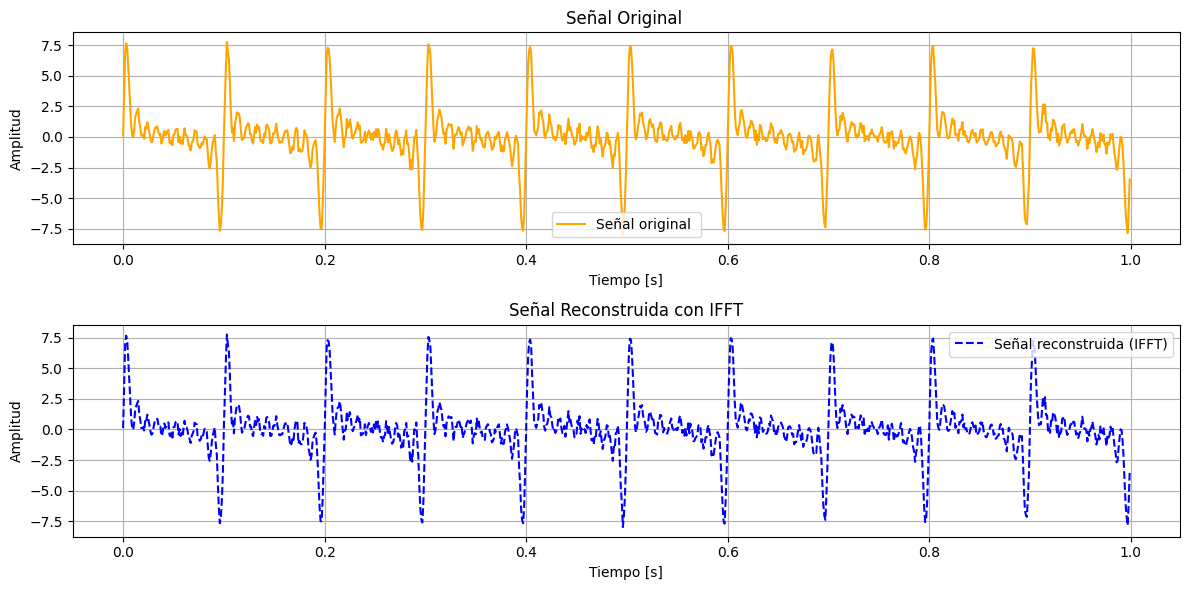

In [ ]:
# Reconstrucción de la señal en el dominio del tiempo usando la IFFT
senal_reconstruida = np.fft.ifft(fft_senal).real  # Solo la parte real, ya que la señal es real

# Graficar ambas señales en gráficos separados
plt.figure(figsize=(12, 6))

# Señal original con ruido
plt.subplot(2, 1, 1)
plt.plot(t, senal_con_ruido, label='Señal original ', color='orange')
plt.title('Señal Original ')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Señal reconstruida con IFFT
plt.subplot(2, 1, 2)
plt.plot(t, senal_reconstruida, label='Señal reconstruida (IFFT)', color='blue', linestyle='--')
plt.title('Señal Reconstruida con IFFT')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Aplicamos un filtro para frecuencias menores a 60hz

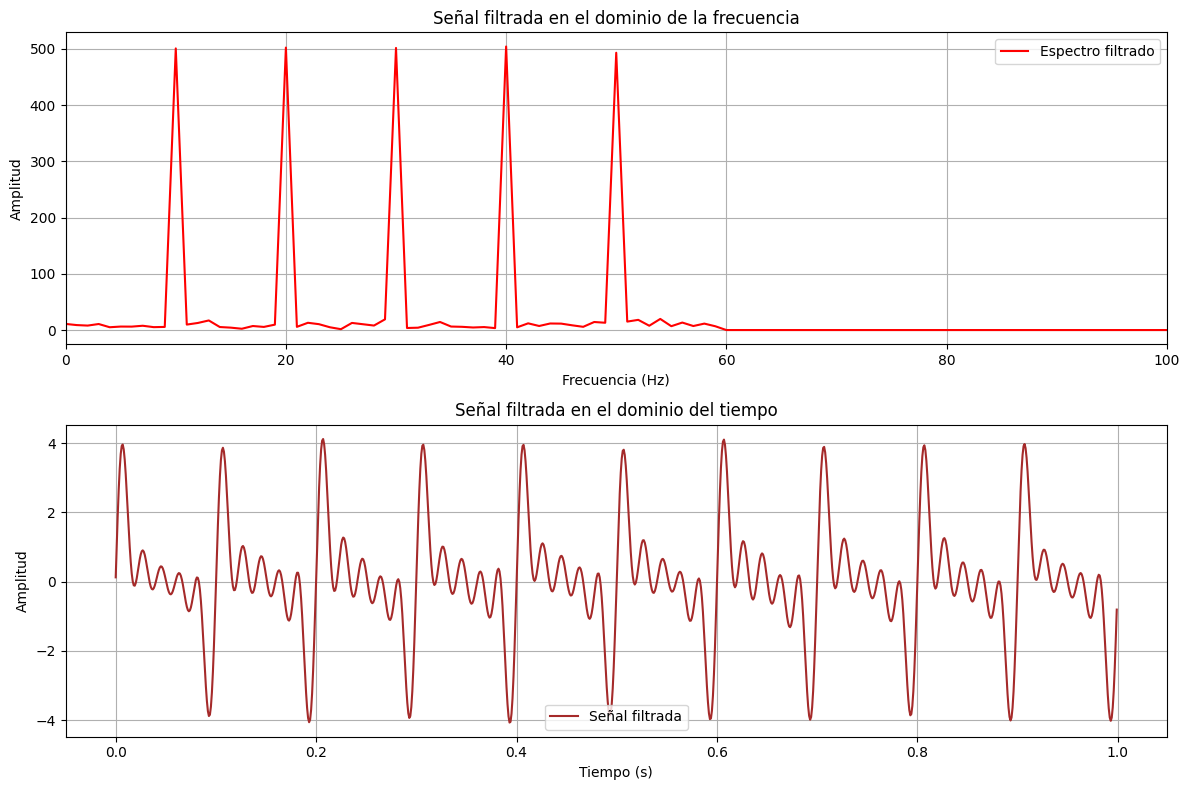

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del filtro
frecuencia_corte = 60  # Umbral de corte en Hz
frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz

# Calcular la FFT de la señal con ruido
fft_senal = np.fft.fft(senal_con_ruido)
frecuencias = np.fft.fftfreq(len(t), d=1/frecuencia_muestreo)

# Crear el filtro pasa bajas utilizando una función escalón
filtro_pb = np.heaviside(frecuencia_corte - np.abs(frecuencias), 0)

# Aplicar el filtro pasa bajas en el dominio de la frecuencia
fft_filtrada = fft_senal * filtro_pb

# Reconstruir la señal filtrada en el dominio del tiempo
senal_filtrada_tiempo = np.fft.ifft(fft_filtrada).real  # Solo la parte real

# Graficar la señal filtrada en el dominio de la frecuencia y del tiempo
plt.figure(figsize=(12, 8))

# Gráfico de la señal filtrada en el dominio de la frecuencia
plt.subplot(2, 1, 1)
plt.title("Señal filtrada en el dominio de la frecuencia")
plt.plot(frecuencias[:len(t)//2], np.abs(fft_filtrada[:len(t)//2]), color="r", label="Espectro filtrado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 100)
plt.legend()
plt.grid()

# Gráfico de la señal filtrada en el dominio del tiempo
plt.subplot(2, 1, 2)
plt.title("Señal filtrada en el dominio del tiempo")
plt.plot(t, senal_filtrada_tiempo, color="brown", label="Señal filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


ECUALIZADOR

Modificamos el codigo del ecualizador de una sola banda a que soporte cuatro bandas de frecuencia.

 Bandas de frecuencia: Graves, bajos-medios, medios-altos, y agudos.


Ajuste de ganancia independiente para cada banda.

Visualización de la señal original y la señal procesada.

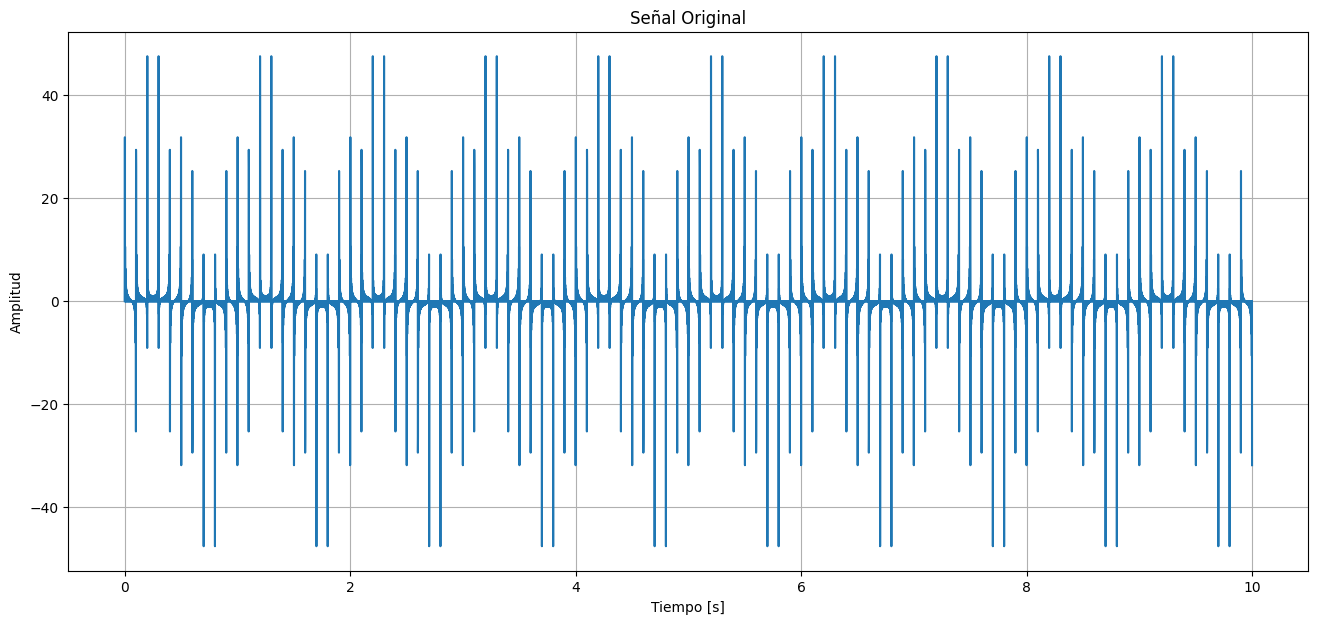

interactive(children=(IntSlider(value=0, description='gain1', max=10, min=-10), IntSlider(value=0, description…

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.signal import butter, lfilter

# Generar la señal
class SignalGenerator:
    def __init__(self, frequency, amplitude, duration, sampling_rate):
        self.frequency = frequency
        self.amplitude = amplitude
        self.duration = duration
        self.sampling_rate = sampling_rate
        self.time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
        self.sine_wave = [amplitude * np.sin(2 * np.pi * f * self.time) for f in frequency]

# Filtro Butterworth pasa banda
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = max(lowcut / nyquist, 0.0001)  # Asegurar que low > 0
    high = min(highcut / nyquist, 0.9999)  # Asegurar que high < 1
    if low >= high:
        raise ValueError("La frecuencia inferior debe ser menor que la frecuencia superior.")
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    if b is None or a is None:  # Si el filtro no es válido
        return np.zeros_like(data)
    y = lfilter(b, a, data)
    return y

# Visualización
def plot_dsp(signal, sample_rate, time, title="Señal"):
    plt.figure(figsize=(16, 7))
    plt.plot(time, signal)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.title(title)
    plt.grid()
    plt.show()

# Configuración de la señal
f = np.arange(1, 500, 10)
generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

# Graficar señal original
plot_dsp(signal, sample_rate=1000, time=generador.time, title="Señal Original")

# Ecualizador de 4 bandas interactivo
@interact(
    gain1=(-10, 10, 1),
    gain2=(-10, 10, 1),
    gain3=(-10, 10, 1),
    gain4=(-10, 10, 1)
)
def equalizer(gain1=0, gain2=0, gain3=0, gain4=0):
    sample_rate = generador.sampling_rate
    nyquist = sample_rate / 2

    # Calcular dinámicamente las bandas de frecuencia
    bands = [
        (0.1, nyquist * 0.25),   # Graves
        (nyquist * 0.25, nyquist * 0.5),  # Bajos-medios
        (nyquist * 0.5, nyquist * 0.75),  # Medios-altos
        (nyquist * 0.75, nyquist - 0.1)   # Agudos
    ]

    gains = [gain1, gain2, gain3, gain4]

    # Filtrar y aplicar ganancia a cada banda
    signal_processed = np.zeros_like(signal)
    for i, ((lowcut, highcut), gain) in enumerate(zip(bands, gains)):
        try:
            band_signal = butter_bandpass_filter(signal, lowcut, highcut, sample_rate, order=2)
            band_signal *= np.power(10, (gain / 20))
            signal_processed += band_signal
        except ValueError as e:
            print(f"Error con la banda {i + 1} ({lowcut}-{highcut} Hz): {e}")

    # Graficar la señal procesada
    plot_dsp(signal_processed, sample_rate=1000, time=generador.time, title="Señal Procesada")
